<a href="https://colab.research.google.com/github/chenphopp/marketing_segmentation/blob/main/9_Telco_KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
# df = pd.read_csv("9_Telco.csv")
url = "https://github.com/chenphopp/marketing_segmentation/raw/main/9_Telco.csv"
df = pd.read_csv(url)
print(df.shape)
df.head()

(2000, 19)


,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge
0,KS,128,415,382-4657,no,yes,25,265.100006,110,45.070000,197.399994,99,16.780001,244.699997,91,11.01,10.0,3,2.70
1,OH,107,415,371-7191,no,yes,26,161.600006,123,27.469999,195.500000,103,16.620001,254.399994,103,11.45,13.7,3,3.70
2,NJ,137,415,358-1921,no,no,0,243.399994,114,41.380001,121.199997,110,10.300000,162.600006,104,7.32,12.2,5,3.29
3,OH,84,408,375-9999,yes,no,0,299.399994,71,50.900002,61.900002,88,5.260000,196.899994,89,8.86,6.6,7,1.78
4,OK,75,415,330-6626,yes,no,0,166.699997,113,28.340000,148.300003,122,12.610000,186.899994,121,8.41,10.1,3,2.73


In [6]:
# ตั้งค่า 'Phone' เป็น index
df = df.set_index("Phone")
print(df.shape)
df.head()

(2000, 18)


,State,AccountLength,AreaCode,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge
Phone,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,no,yes,25,265.100006,110,45.070000,197.399994,99,16.780001,244.699997,91,11.01,10.0,3,2.70
371-7191,OH,107,415,no,yes,26,161.600006,123,27.469999,195.500000,103,16.620001,254.399994,103,11.45,13.7,3,3.70
358-1921,NJ,137,415,no,no,0,243.399994,114,41.380001,121.199997,110,10.300000,162.600006,104,7.32,12.2,5,3.29
375-9999,OH,84,408,yes,no,0,299.399994,71,50.900002,61.900002,88,5.260000,196.899994,89,8.86,6.6,7,1.78
330-6626,OK,75,415,yes,no,0,166.699997,113,28.340000,148.300003,122,12.610000,186.899994,121,8.41,10.1,3,2.73


In [7]:
df = df.drop(columns=["AreaCode"])
df = df.drop(columns=["AccountLength"])
df

,State,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge
Phone,,,,,,,,,,,,,,,,
382-4657,KS,no,yes,25,265.100006,110,45.070000,197.399994,99,16.780001,244.699997,91,11.01,10.0,3,2.70
371-7191,OH,no,yes,26,161.600006,123,27.469999,195.500000,103,16.620001,254.399994,103,11.45,13.7,3,3.70
358-1921,NJ,no,no,0,243.399994,114,41.380001,121.199997,110,10.300000,162.600006,104,7.32,12.2,5,3.29
375-9999,OH,yes,no,0,299.399994,71,50.900002,61.900002,88,5.260000,196.899994,89,8.86,6.6,7,1.78
330-6626,OK,yes,no,0,166.699997,113,28.340000,148.300003,122,12.610000,186.899994,121,8.41,10.1,3,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397-9251,TX,no,no,0,180.500000,88,30.690001,134.699997,102,11.450000,170.699997,97,7.68,10.0,3,2.70
395-6913,FL,no,yes,29,214.699997,86,36.500000,314.299988,109,26.719999,280.200012,110,12.61,14.3,2,3.86
371-9414,NY,no,no,0,174.300003,85,29.629999,254.100006,95,21.600000,176.399994,96,7.94,5.9,3,1.59


In [8]:
# แยก numerical กับ categorical
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
# if "AreaCode" in numeric_cols:
#     numeric_cols.remove("AreaCode")

# categorical: object + AreaCode
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
# categorical_cols.append("AreaCode")

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['VMailMessage', 'DayMins', 'DayCalls', 'DayCharge', 'EveMins', 'EveCalls', 'EveCharge', 'NightMins', 'NightCalls', 'NightCharge', 'IntlMins', 'IntlCalls', 'IntlCharge']
Categorical columns: ['State', 'IntlPlan', 'VMailPlan']


In [9]:
# Preprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols)
])

X = preprocessor.fit_transform(df)
print(X)

[[ 1.22387747  1.5526056   0.4739572  ...  0.          0.
   1.        ]
 [ 1.29660611 -0.31975253  1.13054752 ...  0.          0.
   1.        ]
 [-0.59433841  1.16004334  0.67598499 ...  0.          1.
   0.        ]
 ...
 [-0.59433841 -0.09000429 -0.7887165  ...  0.          1.
   0.        ]
 [-0.59433841  1.01712916  0.3729433  ...  0.          1.
   0.        ]
 [-0.59433841  1.03160155 -0.48567481 ...  1.          1.
   0.        ]]


In [10]:
# เอาชื่อฟีเจอร์มาใช้ตั้งคอลัมน์
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
feature_names = np.r_[numeric_cols, cat_feature_names]

# แปลงเป็น DataFrame โดยตรงc
X_df = pd.DataFrame(X, columns=feature_names, index=df.index)

print(X_df.shape)
X_df.head()

(2000, 68)


,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,IntlPlan_no,IntlPlan_yes,VMailPlan_no,VMailPlan_yes
Phone,,,,,,,,,,,,,,,,,,,,,
382-4657,1.223877,1.552606,0.473957,1.552859,-0.081931,-0.075417,-0.081741,0.861289,-0.464949,0.860607,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
371-7191,1.296606,-0.319753,1.130548,-0.320023,-0.119210,0.127454,-0.118674,1.050863,0.147262,1.051700,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
358-1921,-0.594338,1.160043,0.675985,1.160192,-1.577016,0.482478,-1.577526,-0.743254,0.198280,-0.741969,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
375-9999,-0.594338,2.173107,-1.495814,2.173251,-2.740515,-0.633313,-2.740915,-0.072903,-0.566985,-0.073143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
330-6626,-0.594338,-0.227492,0.625478,-0.227443,-1.045299,1.091092,-1.044306,-0.268341,1.065580,-0.268579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [11]:
# ลูปลอง k เพื่อดู inertia (elbow) และ silhouette
ks = range(2, 15)
inertias, sils = [], []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X, labels))


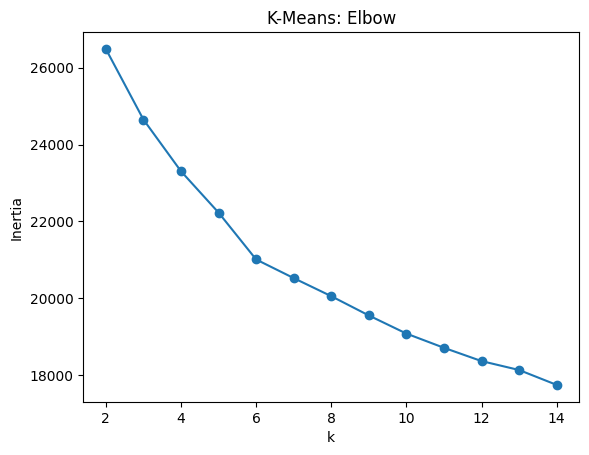

In [12]:
# กราฟ elbow
plt.figure()
plt.plot(list(ks), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("K-Means: Elbow")
plt.show()

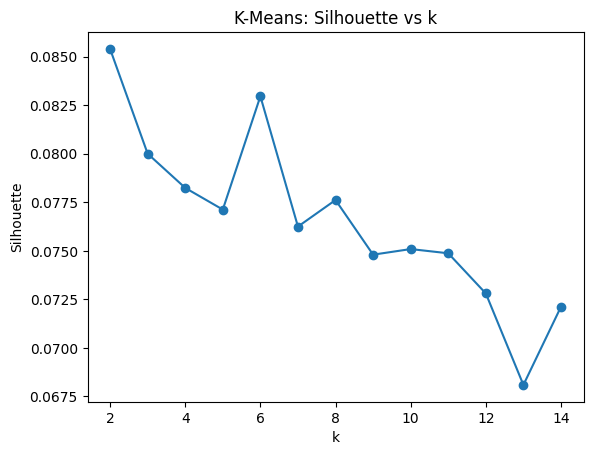

In [13]:
# กราฟ silhouette
plt.figure()
plt.plot(list(ks), sils, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.title("K-Means: Silhouette vs k")
plt.show()

In [14]:
# เลือก k ที่ต้องการ
best_k = 6
kmeans = KMeans(best_k, random_state=42)
kmeans_pipe = Pipeline([("prep", preprocessor), ("cluster", kmeans)])

In [15]:
labels_km = kmeans_pipe.fit_predict(df)
print(labels_km)

[5 5 2 ... 0 4 3]


In [16]:
#เพิ่ม label กลับเข้า DataFrame เพื่อวิเคราะห์
df_km = df.copy()
df_km["Cluster"] = labels_km
#print("Silhouette (k-means):", silhouette_score(preprocessor.transform(df), labels_km))
print(df_km.shape)
df_km.head()

out_path = "df_km.xlsx"
df_km.to_excel(out_path, index=False)  # ไม่ต้องเซฟ index
print("saved:", out_path)

(2000, 17)
saved: df_km.xlsx


In [17]:
#สรุปจำนวนสมาชิกแต่ละคลัสเตอร์
print(df_km["Cluster"].value_counts())

Cluster
5    380
1    369
4    328
3    318
2    308
0    297
Name: count, dtype: int64


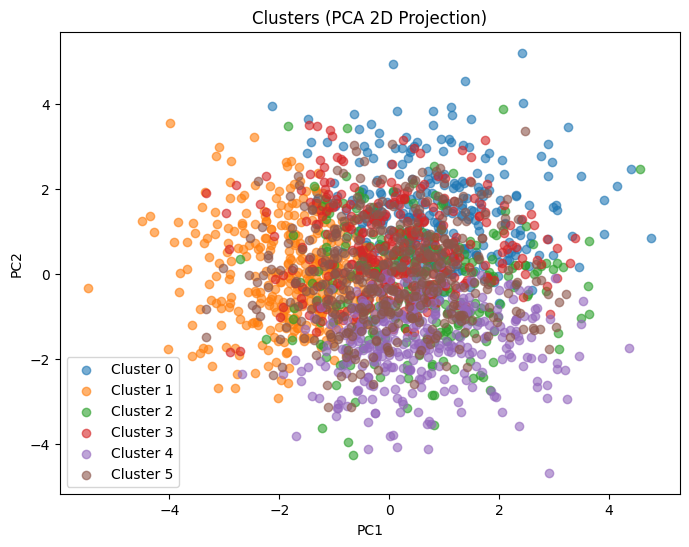

In [18]:
# ลดมิติข้อมูลเหลือ 2 มิติ
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(preprocessor.transform(df))

# สร้าง DataFrame สำหรับ plot
plot_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
plot_df["Cluster"] = labels_km

# Plot scatter
plt.figure(figsize=(8,6))
for c in sorted(plot_df["Cluster"].unique()):
    subset = plot_df[plot_df["Cluster"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {c}", alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters (PCA 2D Projection)")
plt.legend()
plt.show()


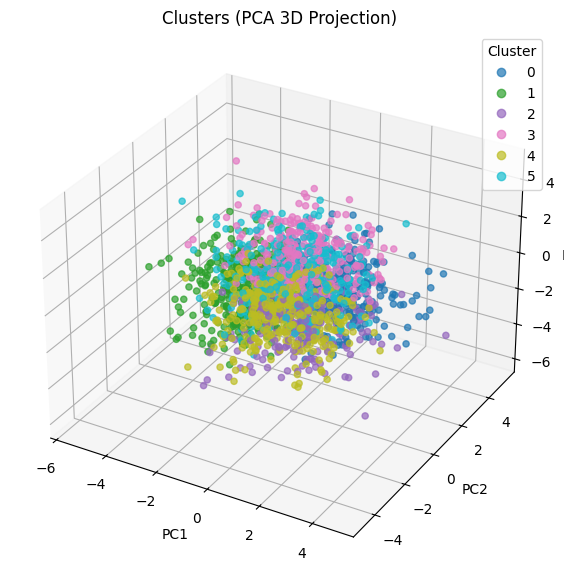

In [19]:
# 3 มิติ Plot
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(preprocessor.transform(df))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                     c=labels_km, cmap="tab10", alpha=0.7)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Clusters (PCA 3D Projection)")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

In [20]:
def cluster_profile(data_with_labels, label_col="Cluster", top_cat=5):
    out = {}
    for c in sorted(data_with_labels[label_col].unique()):
        sub = data_with_labels[data_with_labels[label_col]==c]
        # ตัวเลข: ค่าเฉลี่ย
        num_mean = sub[numeric_cols].mean().sort_values(ascending=False)
        # หมวดหมู่: นับสัดส่วน (เฉพาะ top_cat)
        cat_props = {}
        for col in categorical_cols:
            props = (sub[col].value_counts(normalize=True)
                     .head(top_cat).map(lambda v: f"{v:.1%}").to_dict())
            cat_props[col] = props
        out[c] = {"n": len(sub), "num_mean": num_mean.to_dict(), "cat_props": cat_props}
    return out

In [21]:
profile_km = cluster_profile(df_km, "Cluster", top_cat=5)

for c, stats in profile_km.items():
    print(f"\n=== Cluster {c} (n={stats['n']}) ===")

    # ตัวเลข: แสดงเฉลี่ย top 10 ตัวแรก (ตัดให้สั้น)
    num_mean = stats["num_mean"]
    for feat, val in list(num_mean.items())[:10]:
        print(f"- {feat}: {val:.3f}")

    # หมวดหมู่: สัดส่วน
    print("Categoricals:")
    for col, props in stats["cat_props"].items():
        pairs = [f"{k}: {v}" for k, v in props.items()]
        print(f"  • {col} -> " + "; ".join(pairs))


=== Cluster 0 (n=297) ===
- EveMins: 238.246
- NightMins: 231.905
- DayMins: 181.008
- NightCalls: 100.603
- DayCalls: 99.990
- EveCalls: 96.640
- DayCharge: 30.772
- EveCharge: 20.251
- NightCharge: 10.435
- IntlMins: 7.229
Categoricals:
  • State -> ND: 4.0%; DE: 3.7%; MA: 3.7%; RI: 3.7%; MN: 3.4%
  • IntlPlan -> no: 96.6%; yes: 3.4%
  • VMailPlan -> no: 84.8%; yes: 15.2%

=== Cluster 1 (n=369) ===
- EveMins: 220.164
- NightMins: 171.946
- DayMins: 115.552
- EveCalls: 103.301
- NightCalls: 100.840
- DayCalls: 97.450
- DayCharge: 19.644
- EveCharge: 18.714
- IntlMins: 10.990
- NightCharge: 7.738
Categoricals:
  • State -> MN: 3.8%; RI: 3.5%; OR: 3.0%; TX: 3.0%; WV: 3.0%
  • IntlPlan -> no: 90.5%; yes: 9.5%
  • VMailPlan -> no: 83.7%; yes: 16.3%

=== Cluster 2 (n=308) ===
- DayMins: 184.651
- NightMins: 172.132
- EveMins: 144.087
- DayCalls: 102.760
- EveCalls: 100.669
- NightCalls: 99.844
- DayCharge: 31.391
- EveCharge: 12.248
- IntlMins: 8.363
- NightCharge: 7.746
Categoricals:
  •